# Part II - (Borrower Features that influence Interest Rates)
## by (Millicent Abban)





## Investigation Overview


In this analyses I wanted to have a look at the various features of characteristics attached to a borrow that likely influences their interest rate when seeking a loan.The outmost focus was on the loan amount, Proser ratings i?e the ratings recieved form the institutions and being a home owner or not .



## Dataset Overview

The data consist of BorrowerRate i.e interest rates and loans of about 113,937 entries of borrowers and other features.The features include monthly income, homeownership, ratings and employment status among many others .

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
Loan = pd.read_csv('prosperLoanData.csv')

In [3]:
#Selcting a subset of the dataset to be used 
cols = ['ListingNumber','Term', 'LoanStatus','BorrowerAPR','BorrowerRate','ProsperRating (Alpha)','ProsperScore','Occupation','EmploymentStatus','StatedMonthlyIncome','IsBorrowerHomeowner','LoanOriginalAmount']
df_loan = Loan[cols]

In [4]:
#Renaming the column to something simpler.
df_loan.rename(columns={'IsBorrowerHomeowner': 'homeowner'}, inplace=True)

In [5]:
#Ensuring that no missing data from the Borrower rate is present
df_loan = df_loan[~df_loan.BorrowerRate.isnull()]

In [6]:
#Converting ProsperRatings into an ordered categorical type

ordinal_var_dict = {'ProsperRating (Alpha)':['AA','A','B','C','D','E','HR']}

for var in ordinal_var_dict :
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                               categories = ordinal_var_dict[var])
    df_loan['ProsperRating (Alpha)'] = df_loan['ProsperRating (Alpha)'].astype(ordered_var)

## BorrowerRate Distribution

The BorrowerRate which is teh interest rate on the loan begins from alittle after 0 up until 0.4 percent with a few peaks and after using a log scale it appears a little bit bimodal.

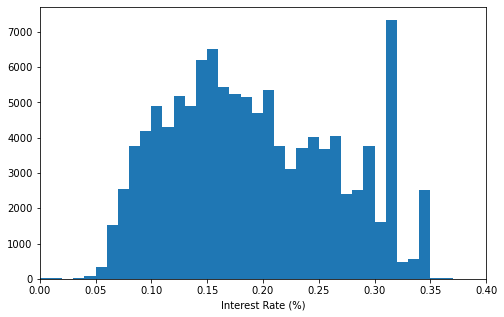

In [7]:
binsize = 0.01
bins = np.arange(0, 0.40, 0.01)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'BorrowerRate', bins = bins)
plt.xlim([0,0.4])
plt.xlabel('Interest Rate (%)')
plt.show()

## Distribution of Loan Amounts

The loan values take on the lower rates mostly ranging from as low as 500 and as high as 35000 and after a log scale appear to be evenly spread with a few peaks.

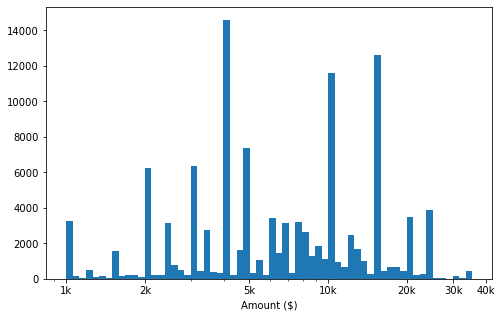

In [8]:
#Investigating further with a smaller binsize
log_binsize = 0.025
bins = 10**np.arange(3, np.log10(df_loan['LoanOriginalAmount'].max())+log_binsize,log_binsize )

plt.figure(figsize=(8,5))
plt.hist(data = df_loan, x = 'LoanOriginalAmount', bins=bins)
plt.xscale('log')
plt.xticks([1e3,2e3,5e3,1e4,2e4,3e4,4e4],['1k','2k','5k','10k','20k','30k','40k'])
plt.xlabel('Amount ($)')
plt.show();

## BorrowerRate on LoanAmount
Most of the loans are spread on the lower value with a few very large amounts. The relationship between the two variables is approximately an inverse one as BorrowerRate increases loan amounts decreases and vice versa with the least amount being 500 and the highest being 35000



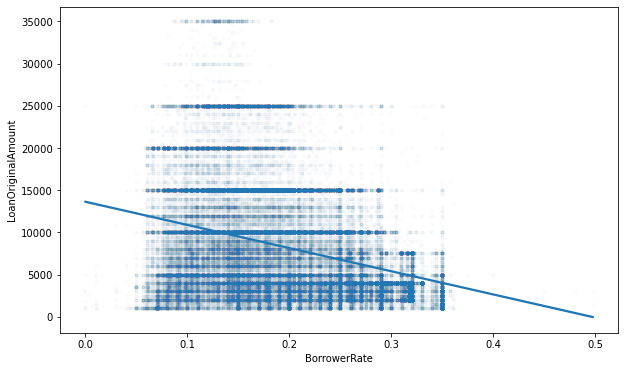

In [9]:
#Scatter plot of BorrowerRate and LoanOriginalAmount with a log transformation of LoanAmount

plt.figure(figsize= (10,6))
sb.regplot(data = df_loan, x = 'BorrowerRate', y='LoanOriginalAmount',marker='.', scatter_kws= {'alpha':0.01});


## ProsperRatings on BorrowerRate and LoanAmount
ProsperRating in association with rate and loan produces an unsual relationship, that is to say for borrowers with better ratings Like "AA" when the loan increases the rate also increase but with lower ratings like "E" the rate decreases as the loan increases.It could be viewed as a strategy to get the low rated to borrow more considering their ratings.

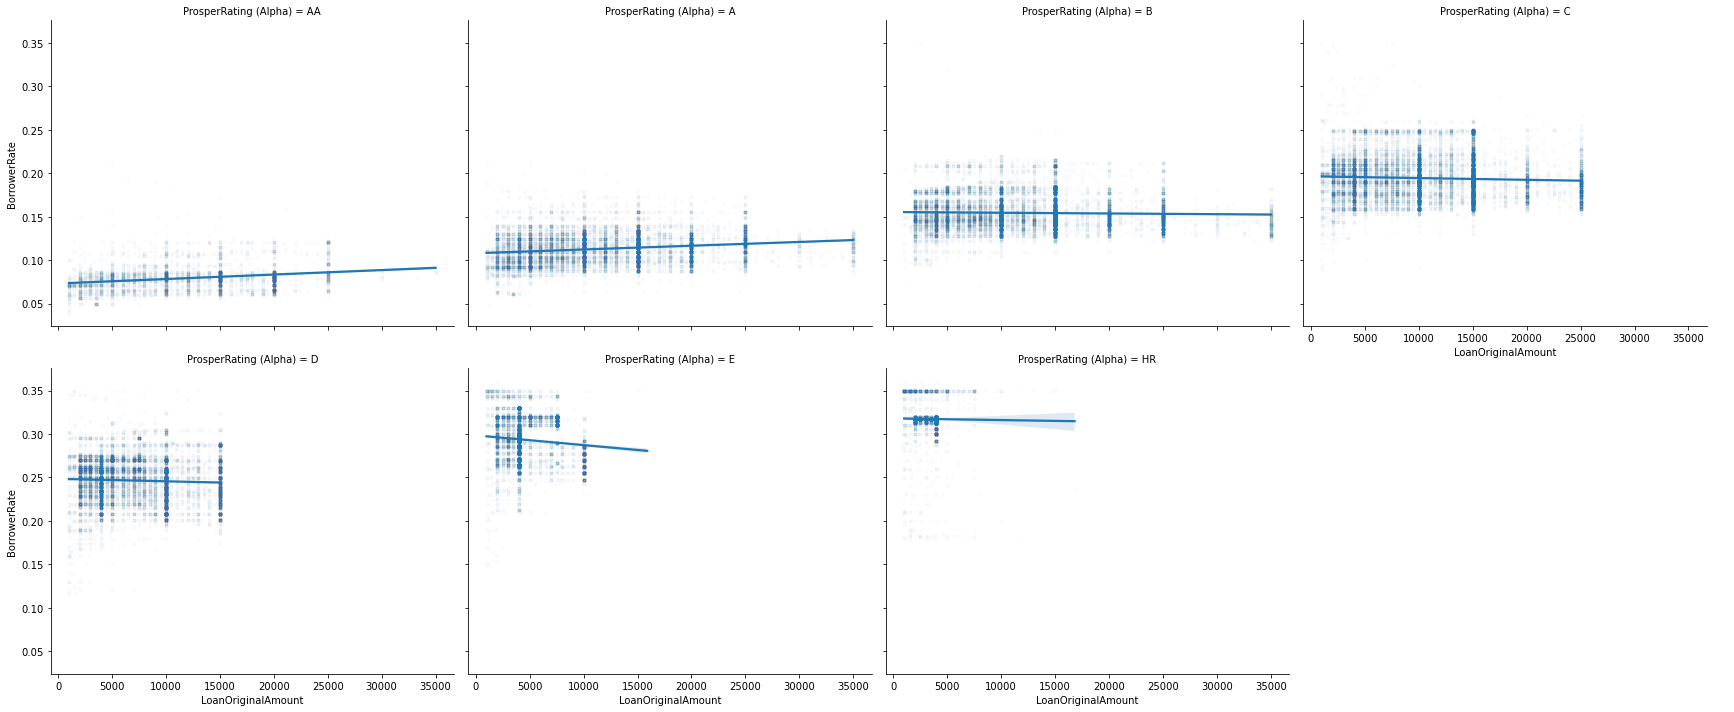

In [10]:
#The influence of ProsperRating on BorrowerRate and LoanAmount

g = sb.FacetGrid(data = df_loan, aspect=1.2, height= 5, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sb.regplot,'LoanOriginalAmount', 'BorrowerRate', x_jitter=0.04,marker= '.', scatter_kws={'alpha':0.01})
g.add_legend();


## ProsperRating and Homerowner on BorrowerRate
This plot indicates how much the better rated borrowers who also own homes experiencing lower interest rates companred to the lower rated who are not homeowners and also with higher interest rates 

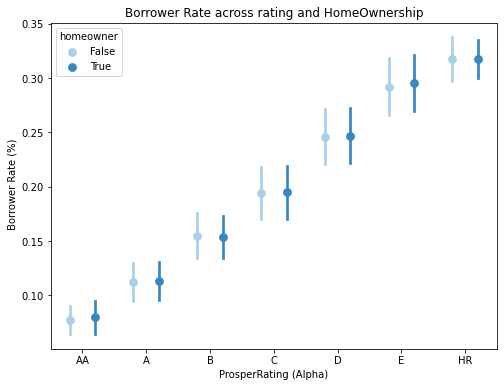

In [11]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_loan, x = 'ProsperRating (Alpha)', y = 'BorrowerRate', hue = 'homeowner',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower Rate across rating and HomeOwnership')
plt.ylabel(' Borrower Rate (%)')
ax.set_yticklabels([],minor = True);

## ProsperRating and Homeowner on LoanOmount and Monthly income
High income earner who are homeowner with better ratings compared with non homeowners . Also seeing a number of homeowners with better ratings who with large amounts of loans which could be accompanied iwth low interest rates and I believe is a good sign for a potential investor because you knwo the borrow has a good collateral to fall back on should they not be able to follwo through with their payment plan.

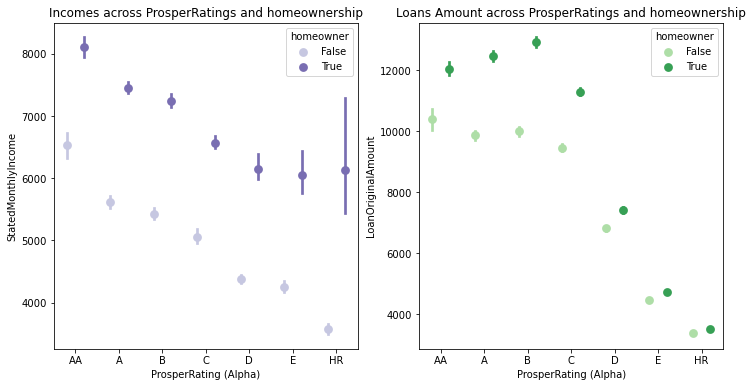

In [12]:
fig, ax = plt.subplots(ncols=2, figsize=[12,6])
sb.pointplot(data = df_loan, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'homeowner',
           palette = 'Purples', linestyles = '', dodge = 0.4, ax=ax[0])
ax[0].set_title('Incomes across ProsperRatings and homeownership')
sb.pointplot(data = df_loan, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'homeowner',
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[1])
ax[1].set_title('Loans Amount across ProsperRatings and homeownership');

# CONCLUSION



The initial ideology or view I had was that the interest rate is largely influenced by the amount of loan you get as I thought the higher the amount the the lower the rate and vice versa . However, through the analyses I was proved otherwise because to be granted a loan a lot of other factors need to be considered such as being a home owner, prosper ratings(the organisations rating of customers), employment status as well as the APR . The analyses comfirmed the relationship / interaction these other factors have with the interest rate a Borrower is given for a loan . As an investor looking to put some funds in a financial institution I believe you need to consider all these to check if its meets specifications.





   # THANK YOU 
   
   

In [14]:
!jupyter nbconvert Part_2_data_exploration.ipynb --to slides --post serve --no-input

[NbConvertApp] Converting notebook Part_2_data_exploration.ipynb to slides
[NbConvertApp] Writing 1090568 bytes to Part_2_data_exploration.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\sweet\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\sweet\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\sweet\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\sweet\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\sweet\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filenam